This is one of the final notebooks for use after the ANN model has been produced. In this notebook, the models and train, val and test sets generated in ***Final: Hyperband_Tuner_simpleANN_allfiles Neural Network with 106 MAE.ipynb*** are loaded in and the performance on the test set is evaluated. The model is then analysed and its predictions validated. This notebook does not contain the fitting process so the graphs of validation error history cannot be produced. The model and test train and validation sets will need to have been produced in ***Final: Hyperband_Tuner_simpleANN_allfiles Neural Network with 106 MAE.ipynb*** and simply loaded into this notebook

## **Imports and Installing**

Import the necessary python libraries

In [ ]:
from numpy.random import seed
seed(908)
from tensorflow.random import set_seed
set_seed(1908)
from tensorflow.keras.utils import set_random_seed
set_random_seed(1908)


from netCDF4 import Dataset
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import csv
from datetime import datetime
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import PIL
import warnings
from csv import writer
from scipy import ndimage as nd
import random


from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model
from keras.layers import Dense
from keras.layers import Input
from keras.layers import concatenate
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

## **Connect to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


## **Load in the Train, Val and Test Sets**

In [ ]:
directory = new_file_directory = '/content/gdrive/MyDrive/Colab Notebooks/Data/Train, Test, Val/ANN (rounding fixed)/'
x_train=np.load(directory+'x_train.npy')
y_train=np.load(directory+'y_train.npy')
x_val=np.load(directory+'x_val.npy')
y_val=np.load(directory+'y_val.npy')
x_test=np.load(directory+'x_test.npy')
y_test=np.load(directory+'y_test.npy')

## **Load in the Fitted Model**

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/Models/RoundingFixedSimpleANN6A7H2048BS500EFinalModel')

## **Analyse the Model**

Plot the model

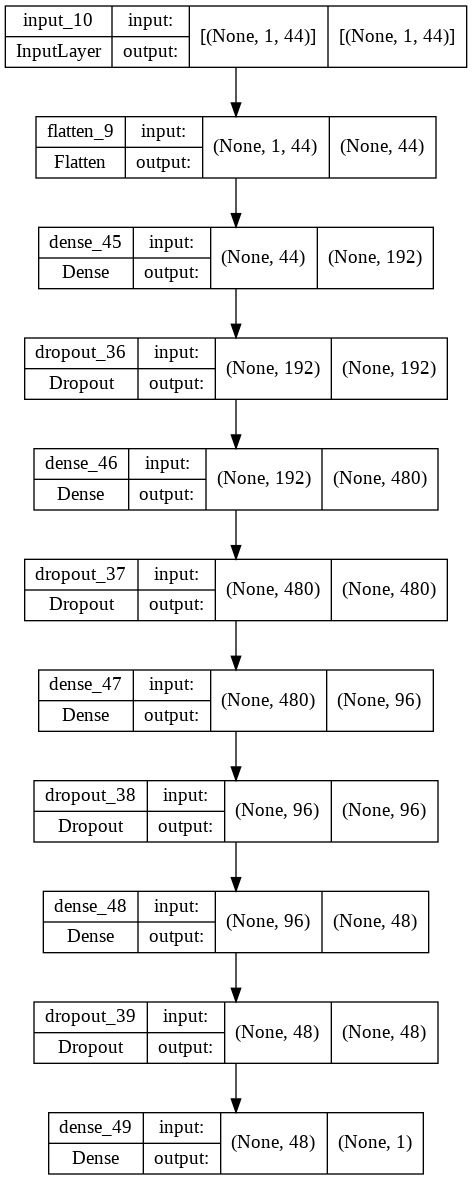

In [ ]:
keras.utils.plot_model(model, "single-headed ANN.png", show_shapes=True)

Print the test accuracy we have achieved

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

2072/2072 [==============================] - 6s 3ms/step - loss: 38997.8711 - mae: 101.7193
Test accuracy: 101.719
Test loss: 38997.871


Print the validation accuracy we have achieved

In [ ]:
val_loss, val_acc = model.evaluate(x_val, y_val, batch_size=2048)
print(f"Val accuracy: {val_acc:.3f}")
print(f"Val loss: {val_loss:.3f}")

130/130 [==============================] - 2s 14ms/step - loss: 38454.4766 - mae: 101.2780
Val accuracy: 101.278
Val loss: 38454.477


Use the model to make predictions on the test data and explicitly store these in a predictions variable

In [ ]:
predictions=model.predict(x_test)
print(predictions.shape)
print(y_test.shape)

(265146, 1)
(265146, 1)


Plot the predictions and the true labels on the same histogram to compare the model's predictions to the ground truth data

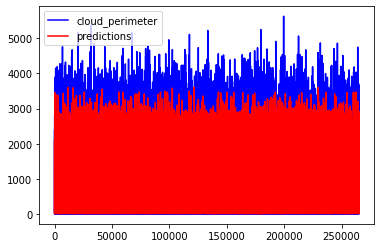

In [ ]:
x_range=range(len(predictions))
predictions=tf.squeeze(predictions)
y_test=tf.squeeze(y_test)
plt.plot(x_range,y_test,color='blue',label='cloud_perimeter')
plt.plot(x_range,predictions,color='red',label='predictions')
plt.legend()
plt.show()

Assert that the removal of all data points with a zero cloud fraction has removed all data points with a zero cloud perimeter (this is a sanity check which checks that the data has been cleaned correctly)

In [ ]:
zero_perimeters = y_test[y_test==0]
print(len(zero_perimeters)/len(y_test))

0.0


Plot a histogram of the predictions

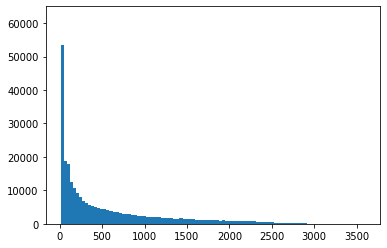

In [ ]:
plt.hist(predictions,bins=100)
plt.ylim((0,65000))
plt.show()

Plot the equivalent histogram for the true labels

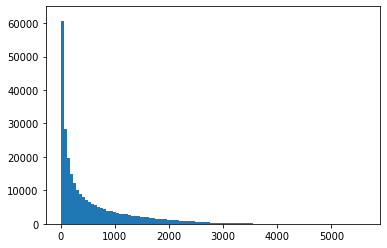

In [ ]:
plt.hist(y_test,bins=100)
plt.ylim((0,65000))
plt.show()

Compute the mean average percentage error using the mae of the model

In [ ]:
test_acc/np.mean(y_test)

0.18263410631310265

Find the equivalent mean average percentage error of a naive prediction which just predicts the mean perimeter on the training data for every single test data point

In [ ]:
print(np.mean(np.absolute(y_test - np.mean(y_train)))/np.mean(y_test))

0.9284917929811055


Plot a scatter graph of the predictions against the true labels to see if there is a good correlation

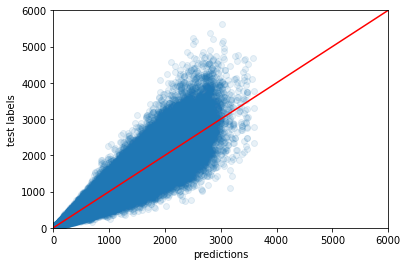

In [ ]:
x=range(6000)
plt.scatter(predictions,y_test,alpha=0.1)
plt.xlabel('predictions')
plt.ylabel('test labels')
plt.ylim((0,6000))
plt.xlim((0,6000))
plt.plot(x,x,color='red')
plt.show()